In [2]:
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [3]:
spotify = pd.read_csv('spotify_project.csv')
spotify.shape

(1556, 23)

In [4]:
tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')

In [5]:
genre = spotify.loc[:, 'Genre']
genre.head()

0    ['indie rock italiano', 'italian pop']
1                    ['australian hip hop']
2                                   ['pop']
3                         ['pop', 'uk pop']
4             ['lgbtq+ hip hop', 'pop rap']
Name: Genre, dtype: object

In [10]:
canadian = spotify[spotify['Genre'].str.contains('canadian')]

In [11]:
australian = spotify[spotify['Genre'].str.contains('australian')]

In [12]:
uk = spotify[spotify['Genre'].str.contains('uk')]

In [13]:
temp = {ord("["): None, ord("]"): None, ord("'"): None, ord("'"): None}

In [14]:
genres = spotify.Genre.apply(lambda x: [i.strip() for i in x.translate(temp).split(",")])

In [15]:
full_list = []
for x in genres:
    full_list += x
len(list(set(full_list)))
# Set is a python structures that cannot have duplicates 
# Convert to set and then convert to list

335

In [16]:
len(full_list)

4665

In [17]:
spotify.loc[:, 'Popularity']

0       100
1        99
2        99
3        98
4        96
       ... 
1551     79
1552     66
1553     81
1554     60
1555     70
Name: Popularity, Length: 1556, dtype: object

In [18]:
# Drop the column Index
spotify.drop('Index', axis = 1, inplace = True)

# The stream columns is separating the numbers in group of three by a comma and I am removing that comma)
spotify.Streams = spotify.Streams.str.replace(',', '')

In [19]:
# Sort the values by the highest charting and the number of times charted
# I consider a song of higher charting as the song with the smallest charting position and charted the most number of time
spotify.sort_values(by = ['Highest Charting Position', 'Number of Times Charted'], ascending = [True, False], inplace = True)

In [20]:
# Create a ranking so it is easier to compare later
num_list = list(range(1, len(spotify) + 1))
spotify['Ranking'] = num_list

# Reset the index of my table so I can manipulate them later
spotify = spotify.reset_index()

In [21]:
# Columns that are numeric in our dataset
numeric_columns = ['Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Ranking']

In [22]:
# I hardcore this but I am dropping all the songs that do not have any value for their numeric columns
spotify = spotify.drop(labels = [64, 221, 238, 257, 380, 713, 743, 1049, 1138, 1337, 1405])

# Reset the index of the dataframe
spotify = spotify.reset_index()

# Update the ranking series to only include songs with values for their numerical columns
num_list = list(range(1, len(spotify) + 1))
spotify['Ranking'] = num_list

In [23]:
# Convert the numerical columns into numbers
for column in numeric_columns:
    spotify[column] = spotify[column].apply (lambda x: pd.to_numeric(x))

In [24]:
# The dataframe now has this weird level_0 and index column, so I just drop it
spotify.drop(['level_0', 'index'], axis = 1, inplace = True)

In [25]:
spotify.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Ranking
0,1,83,2020-06-12--2020-06-19,Blinding Lights,15011809,The Weeknd,35305637,0VjIjW4GlUZAMYd2vXMi3b,"['canadian contemporary r&b', 'canadian pop', ...",2020-03-20,...,0.730,-5.934,0.0598,0.00146,0.0897,171.005,200040,0.334,C#/Db,1
1,1,83,2020-02-14--2020-02-21,Dance Monkey,7687058,Tones And I,2819593,2XU0oxnq2qxCpomAAuJY8K,"['australian pop', 'pop']",2019-10-17,...,0.588,-6.400,0.0924,0.69200,0.1490,98.027,209438,0.513,F#/Gb,2
2,1,78,2020-02-07--2020-02-14,The Box,5145099,Roddy Ricch,6603627,0nbXyq5TXYPCO7pr3N8S4I,"['melodic rap', 'rap', 'trap']",2019-12-06,...,0.586,-6.687,0.0559,0.10400,0.7900,116.971,196653,0.642,A#/Bb,3
3,1,67,2020-07-17--2020-07-24,ROCKSTAR (feat. Roddy Ricch),6180056,DaBaby,7593046,7ytR5pFWmSjzHJIeQkgog4,"['north carolina hip hop', 'rap']",2020-04-17,...,0.690,-7.956,0.1640,0.24700,0.1010,89.977,181733,0.497,B,4
4,1,55,2020-08-07--2020-08-14,Savage Love (Laxed - Siren Beat),5108950,"Jawsh 685, Jason Derulo",100604,1xQ6trAsedVPCdbtDAmk0c,['nz pop'],2020-06-11,...,0.481,-8.520,0.0803,0.23400,0.2690,150.076,171375,0.761,C,5


In [26]:
spotify.corrwith(spotify['Ranking'])

Highest Charting Position    0.995145
Number of Times Charted     -0.439044
Streams                     -0.305206
Popularity                  -0.174718
Danceability                 0.021125
Energy                       0.071377
Loudness                     0.035957
Speechiness                  0.047684
Acousticness                -0.018960
Liveness                     0.015481
Tempo                        0.021091
Duration (ms)               -0.034483
Valence                      0.046058
Ranking                      1.000000
dtype: float64

The more the song chart, the higher the song in the ranking

The more streams the song has, the higher the ranking

The more popular the song is, the higher the ranking

I am surprised that loudness, energy, speechiness, and valence are all positively correlated to ranking. This means that as these components increase, the ranking number also increase, which translate to less popular songs. Maybe it is during the time of COVID where people are stuck at home, so they prefer to listen to more mellow songs with a higher component of acoustincness.  

However, overall, they do not have a strong correlation at all. 

WRONG EXPLANATION

I thought that streams and the ranking will have a positive correlation. However, they have a negative correlation. Streams just means the number of people who have listened to the song for over 30 seconds. Charting means the number of people that the song reaches. Particularly, not every streams are counted toward the charting. A lot of the time, you can see this with Kpop fans where they stream songs a lot, but not all of those songs make it to the chart on Spotify. 

Out of all of the song's characteristics, energy is the most highly correlated, then comes loudness, speechiness, and valence (overall positiveness of the song). These features are very commonly seen in pop songs and mostly rap songs as they are usually louder, with higher energy, and contains faster words (lmao). Furthermore, with the trend of emphasizing on mental health over COVID, it can explain why songs with a more positive meaning will rise to the top. You can see this a lot with BTS songs about self-love or Billie Eilish's songs. 

Aparently, longer songs are less popular. 

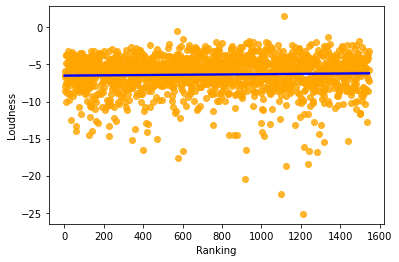

In [27]:
ax = sns.regplot(x = 'Ranking', y = 'Loudness', data = spotify, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})

In [28]:
#Finding upper and lower quartiles and interquartile range
q1 = np.percentile(spotify['Loudness'],25)
q3 = np.percentile(spotify['Loudness'],75)
intQ_range = q3-q1

In [29]:
#Tukey's fences
Lower_fence = q1 - 1.5*intQ_range
Upper_fence = q3 + 1.5*intQ_range

In [30]:
#These are the outlying observations - those outside of Tukey's fences
Outlying_obs = spotify[(spotify.Loudness<Lower_fence) | (spotify.Loudness>Upper_fence)]
Outlying_obs.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Ranking
34,2,8,2020-12-18--2020-12-25,Last Christmas,20709328,Wham!,1631876,2FRnf9qhLbvw8fu4IBXx78,"['disco', 'europop', 'new romantic', 'new wave...",1984-11-29,...,0.478,-12.472,0.0293,0.189,0.3550,107.682,262960,0.9470,D,35
59,4,13,2020-02-14--2020-02-21,No Time To Die,4293009,Billie Eilish,47061119,73SpzrcaHk0RQPFP73vqVR,"['electropop', 'pop']",2020-02-13,...,0.219,-13.273,0.0358,0.917,0.0827,73.537,242265,0.0517,E,60
60,4,10,2021-04-30--2021-05-07,Your Power,5135380,Billie Eilish,47014200,042Sl6Mn83JHyLEqdK7uI0,"['electropop', 'pop']",2021-07-30,...,0.284,-14.025,0.0801,0.932,0.2330,129.642,245897,0.2080,A,61
86,6,7,2020-12-18--2020-12-25,It's Beginning to Look a Lot like Christmas,15424001,Michael Bublé,4702232,5a1iz510sv2W9Dt1MvFd5R,"['adult standards', 'canadian pop', 'jazz pop'...",2012-11-09,...,0.214,-11.714,0.0375,0.908,0.3410,94.775,206640,0.3630,E,87
123,10,69,2019-12-27--2020-01-03,everything i wanted,5448680,Billie Eilish,1250353,1OC8hMoqAuWmTWJ4heJNlO,[],2021-08-13,...,0.225,-14.454,0.0994,0.901,0.1060,120.006,245426,0.2430,F#/Gb,124


In [31]:
#Data without outliers
spotify_without_outliers = spotify[((spotify.Loudness>=Lower_fence) & (spotify.Loudness<=Upper_fence))]

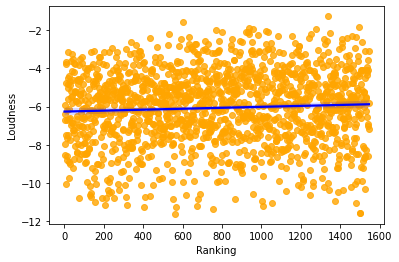

In [32]:
ax = sns.regplot(x = 'Ranking', y = 'Loudness', data = spotify_without_outliers, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})

In [33]:
spotify_without_outliers.corrwith(spotify_without_outliers['Ranking'])

Highest Charting Position    0.995098
Number of Times Charted     -0.443196
Streams                     -0.305983
Popularity                  -0.178003
Danceability                 0.020670
Energy                       0.080979
Loudness                     0.056578
Speechiness                  0.040833
Acousticness                -0.023289
Liveness                     0.013244
Tempo                        0.024884
Duration (ms)               -0.017660
Valence                      0.046734
Ranking                      1.000000
dtype: float64

In [34]:
kpop = spotify[spotify['Genre'].str.contains('k-pop')]
kpop['Language'] = 'Korean'
kpop.head()

/var/folders/qx/y6511cx14579xdbhwdbdj0jc0000gp/T/ipykernel_34289/3211400949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpop['Language'] = 'Korean'


,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Ranking,Language
21,2,49,2020-11-20--2020-11-27,Dynamite,11196819,BTS,37106176,4saklk6nie3yiGePpBwUoc,"['k-pop', 'k-pop boy group']",2020-11-20,...,-4.410,0.0993,0.01120,0.0936,114.044,199054,0.737,F#/Gb,22,Korean
33,2,10,2021-05-21--2021-05-28,Butter,19985713,BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",2021-06-04,...,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab,34,Korean
54,4,38,2020-06-26--2020-07-03,How You Like That,5023592,BLACKPINK,23848461,4SFknyjLcyTLJFPKD2m96o,"['k-pop', 'k-pop girl group']",2020-10-02,...,-5.222,0.0812,0.04650,0.0601,130.032,182956,0.344,B,55,Korean
56,4,29,2020-11-20--2020-11-27,Life Goes On,6142975,BTS,37106176,249gnXrbfmV8NG6jTEMSwD,"['k-pop', 'k-pop boy group']",2020-11-20,...,-5.733,0.0424,0.00691,0.3700,81.068,207481,0.450,C#/Db,57,Korean
70,5,19,2020-08-28--2020-09-04,Ice Cream (with Selena Gomez),4812765,BLACKPINK,23848461,4JUPEh2DVSXFGExu4Uxevz,"['k-pop', 'k-pop girl group']",2020-10-02,...,-4.810,0.3650,0.03170,0.0311,159.972,177813,0.910,A,71,Korean


In [35]:
latin = spotify[spotify['Genre'].str.contains('latin')]
latin['Language'] = 'Spanish'
latin.head()

/var/folders/qx/y6511cx14579xdbhwdbdj0jc0000gp/T/ipykernel_34289/4257766769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latin['Language'] = 'Spanish'


,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Ranking,Language
9,1,39,2021-01-01--2021-01-08,DÁKITI,11524288,"Bad Bunny, Jhay Cortez",36142273,4MzXwWMhyBbmu6hOcLVD49,"['latin', 'reggaeton', 'trap latino']",2020-11-27,...,-10.059,0.0544,0.4010,0.1130,109.928,205090,0.145,E,10,Spanish
20,2,52,2020-09-04--2020-09-11,Hawái,5769714,Maluma,26769304,0GzuHFG4Ql6DoyxFRnIk3F,"['latin', 'reggaeton', 'reggaeton colombiano']",2020-11-05,...,-3.128,0.3120,0.1050,0.1420,179.984,200482,0.609,F#/Gb,21,Spanish
26,2,35,2020-11-27--2020-12-04,LA NOCHE DE ANOCHE,6242863,"Bad Bunny, ROSALÍA",36142273,2XIc1pqjXV3Cr2BQUGNBck,"['latin', 'reggaeton', 'trap latino']",2020-11-27,...,-4.892,0.2860,0.0303,0.0866,81.993,203201,0.391,G,27,Spanish
32,2,10,2021-06-18--2021-06-25,Todo De Ti,26951613,Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",2021-05-20,...,-3.605,0.0506,0.3100,0.0932,127.949,199604,0.342,D#/Eb,33,Spanish
38,3,66,2020-01-17--2020-01-24,Tusa,5510113,"KAROL G, Nicki Minaj",17792779,7k4t7uLgtOxPwTpFmtJNTY,"['latin', 'reggaeton', 'reggaeton colombiano']",2019-11-07,...,-3.280,0.2980,0.2950,0.0574,101.085,200960,0.574,D,39,Spanish


In [36]:
french = spotify[spotify['Genre'].str.contains('french')]
french['Language'] = 'French'
french.head()

/var/folders/qx/y6511cx14579xdbhwdbdj0jc0000gp/T/ipykernel_34289/3768183477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  french['Language'] = 'French'


,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Ranking,Language
844,89,9,2020-09-11--2020-09-18,Bande organisée,5112572,"13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness...",249910,205HNJ73cgpC0LAOnuQiWT,"['french hip hop', 'pop urbaine', 'rap francai...",2020-08-15,...,-2.762,0.274,0.1170,0.0643,142.948,356347,0.805,F#/Gb,845,French
850,90,18,2021-05-28--2021-06-04,Wasted Love (feat. Lagique),5690260,Ofenbach,432581,2pPO9YecZimmuVQfIzfV6U,"['edm', 'new french touch', 'pop dance', 'trop...",2021-01-08,...,-4.578,0.135,0.0821,0.0901,121.955,139563,0.540,F#/Gb,851,French
858,91,26,2021-01-08--2021-01-15,Head Shoulders Knees & Toes (feat. Norma Jean ...,5093408,"Ofenbach, Quarterhead",432511,6i7zAdNhzUN2k1HcrBxPHG,"['edm', 'new french touch', 'pop dance', 'trop...",2020-05-08,...,-5.360,0.193,0.0247,0.1210,124.962,156960,0.600,D,859,French
1000,112,3,2021-06-11--2021-06-18,Petrouchka (feat. PLK),5511544,Soso Maness,289437,03y045SZqaC94yfXl1cU4E,"['francoton', 'french hip hop', 'pop urbaine',...",2021-06-04,...,-4.818,0.311,0.0597,0.2520,133.888,189933,0.818,F#/Gb,1001,French
1009,113,2,2020-06-12--2020-06-19,Djomb - Bien ou quoi,4924714,Bosh,300500,0KBwGCY9RYD9t2zjeW4h48,"['francoton', 'french hip hop', 'pop urbaine',...",2020-05-29,...,-6.600,0.207,0.1720,0.3220,123.109,141893,0.631,C#/Db,1010,French


In [37]:
kpop.corrwith(kpop['Ranking']).sort_values()

Streams                     -0.313804
Number of Times Charted     -0.302658
Popularity                  -0.280483
Danceability                -0.245621
Tempo                       -0.172832
Valence                     -0.145762
Loudness                     0.052775
Speechiness                  0.061495
Duration (ms)                0.126139
Liveness                     0.180834
Energy                       0.193247
Acousticness                 0.283729
Highest Charting Position    0.993471
Ranking                      1.000000
dtype: float64

In [38]:
latin.corrwith(latin['Ranking']).sort_values()

Number of Times Charted     -0.580039
Popularity                  -0.418163
Streams                     -0.320886
Speechiness                 -0.042249
Duration (ms)               -0.027301
Danceability                -0.011698
Liveness                     0.064242
Energy                       0.086855
Acousticness                 0.092793
Valence                      0.105843
Loudness                     0.123267
Tempo                        0.149590
Highest Charting Position    0.995367
Ranking                      1.000000
dtype: float64

In [39]:
french.corrwith(french['Ranking']).sort_values()

Number of Times Charted     -0.727544
Popularity                  -0.618260
Speechiness                 -0.548596
Energy                      -0.526183
Loudness                    -0.304305
Tempo                       -0.260975
Valence                     -0.248569
Streams                     -0.166512
Duration (ms)               -0.005432
Danceability                 0.057555
Liveness                     0.089764
Acousticness                 0.376958
Highest Charting Position    0.999555
Ranking                      1.000000
dtype: float64

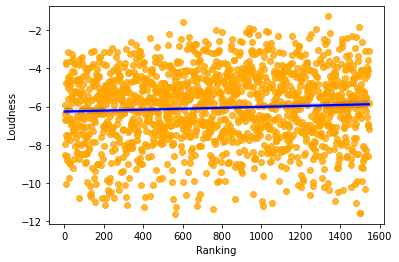

In [40]:
ax = sns.regplot(x = 'Ranking', y = 'Loudness', data = spotify_without_outliers, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})

In [41]:
international_music = pd.concat([kpop, latin, french], axis=0)
international_music

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Ranking,Language
21,2,49,2020-11-20--2020-11-27,Dynamite,11196819,BTS,37106176,4saklk6nie3yiGePpBwUoc,"['k-pop', 'k-pop boy group']",2020-11-20,...,-4.410,0.0993,0.01120,0.0936,114.044,199054,0.737,F#/Gb,22,Korean
33,2,10,2021-05-21--2021-05-28,Butter,19985713,BTS,37106176,2bgTY4UwhfBYhGT4HUYStN,"['k-pop', 'k-pop boy group']",2021-06-04,...,-5.187,0.0948,0.00323,0.0906,109.997,164442,0.695,G#/Ab,34,Korean
54,4,38,2020-06-26--2020-07-03,How You Like That,5023592,BLACKPINK,23848461,4SFknyjLcyTLJFPKD2m96o,"['k-pop', 'k-pop girl group']",2020-10-02,...,-5.222,0.0812,0.04650,0.0601,130.032,182956,0.344,B,55,Korean
56,4,29,2020-11-20--2020-11-27,Life Goes On,6142975,BTS,37106176,249gnXrbfmV8NG6jTEMSwD,"['k-pop', 'k-pop boy group']",2020-11-20,...,-5.733,0.0424,0.00691,0.3700,81.068,207481,0.450,C#/Db,57,Korean
70,5,19,2020-08-28--2020-09-04,Ice Cream (with Selena Gomez),4812765,BLACKPINK,23848461,4JUPEh2DVSXFGExu4Uxevz,"['k-pop', 'k-pop girl group']",2020-10-02,...,-4.810,0.3650,0.03170,0.0311,159.972,177813,0.910,A,71,Korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,159,1,2020-09-18--2020-09-25,DEUX TOILES DE MER,5094137,Damso,3071170,6vw0mOQ5vm3C5RPm7Rvl2w,"['belgian hip hop', 'french hip hop', 'pop urb...",2021-04-28,...,-9.726,0.1280,0.58200,0.1120,104.106,315640,0.157,G#/Ab,1305,French
1347,167,1,2020-01-17--2020-01-24,Dans l'espace (feat. Heuss l'Enfoiré),5678754,Gambi,951798,2KAkkba3PaYFegfmYpUITv,"['francoton', 'french hip hop', 'pop urbaine',...",2020-01-17,...,-6.278,0.1800,0.02860,0.0851,110.050,169702,0.700,C#/Db,1348,French
1353,168,1,2020-01-17--2020-01-24,Blanche,5656775,"Maes, Booba",1603670,5GyyPRvEwdI4wJSUbzxHQv,"['francoton', 'french hip hop', 'pop urbaine',...",2020-01-16,...,-6.121,0.1430,0.52500,0.3060,127.987,193453,0.551,E,1354,French
1384,175,1,2021-03-05--2021-03-12,Mona Lisa,5208787,"Booba, JSX",2161609,5LYRIyhmlrDAQsYdHEvP0f,"['french hip hop', 'old school rap francais', ...",2021-03-04,...,-7.681,0.0742,0.68300,0.1180,134.041,187362,0.246,B,1385,French


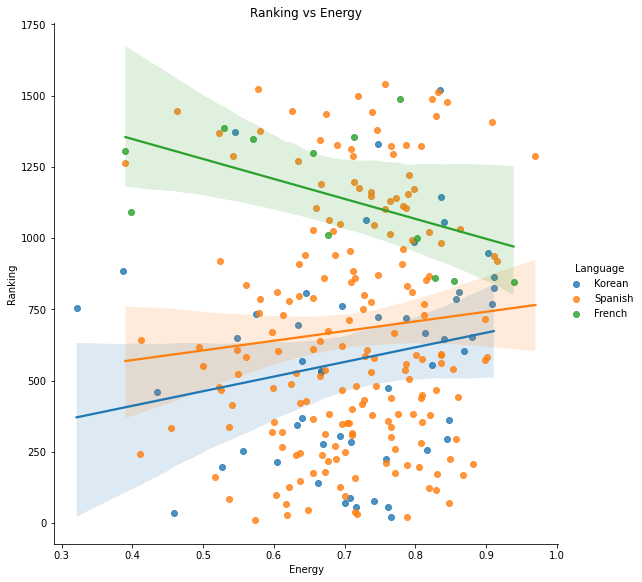

In [42]:
a = sns.FacetGrid(international_music, hue = 'Language', height=8,aspect = 1)
a.map(sns.regplot,'Energy','Ranking')
a.set_axis_labels("Energy", "Ranking")
a.set(title = 'Ranking vs Energy')
a.add_legend()

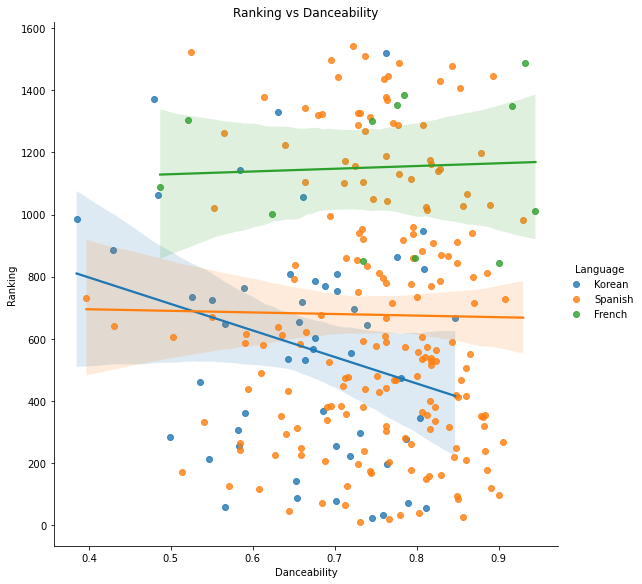

In [43]:
a = sns.FacetGrid(international_music, hue = 'Language', height=8,aspect = 1)
a.map(sns.regplot,'Danceability','Ranking')
a.set_axis_labels("Danceability", "Ranking")
a.set(title = 'Ranking vs Danceability')
a.add_legend()

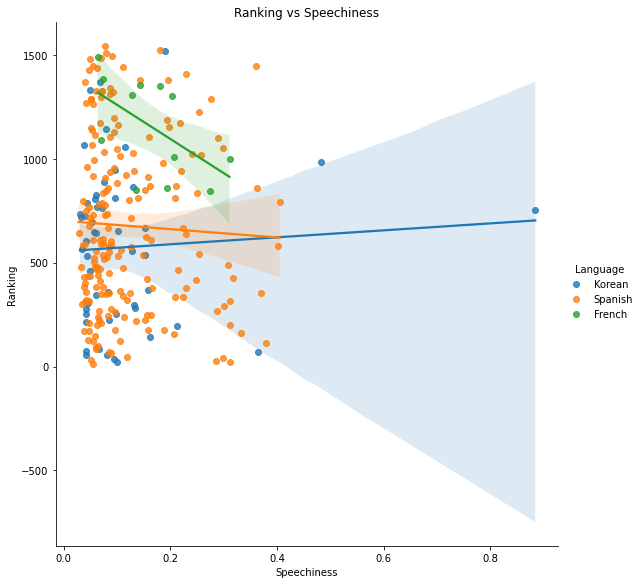

In [44]:
a = sns.FacetGrid(international_music, hue = 'Language', height=8,aspect = 1)
a.map(sns.regplot,'Speechiness','Ranking')
a.set_axis_labels("Speechiness", "Ranking")
a.set(title = 'Ranking vs Speechiness')
a.add_legend()

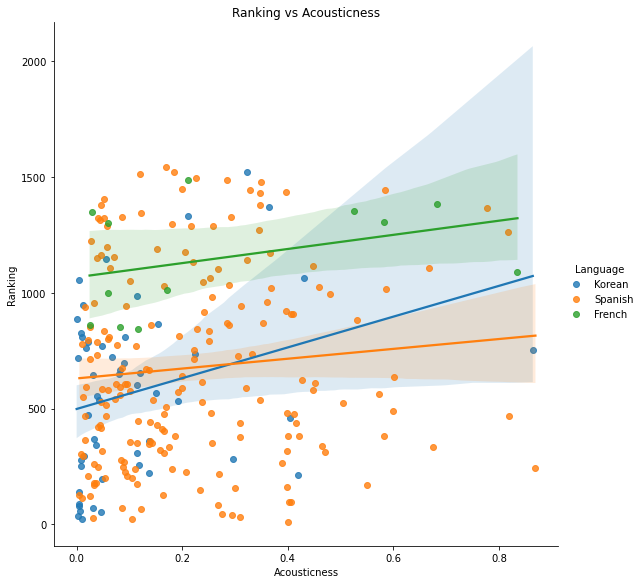

In [45]:
a = sns.FacetGrid(international_music, hue = 'Language', height=8,aspect = 1)
a.map(sns.regplot,'Acousticness','Ranking')
a.set_axis_labels("Acousticness", "Ranking")
a.set(title = 'Ranking vs Acousticness')
a.add_legend()

In [46]:
spotify_tiktok_20 = pd.merge(spotify, tiktok_20, left_on = spotify['Song Name'], right_on = tiktok_20['track_name'])
spotify_tiktok_20.head()

,key_0,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Blinding Lights,1,83,2020-06-12--2020-06-19,Blinding Lights,15011809,The Weeknd,35305637,0VjIjW4GlUZAMYd2vXMi3b,"['canadian contemporary r&b', 'canadian pop', ...",...,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040
1,The Box,1,78,2020-02-07--2020-02-14,The Box,5145099,Roddy Ricch,6603627,0nbXyq5TXYPCO7pr3N8S4I,"['melodic rap', 'rap', 'trap']",...,0,10,0.0559,0.10400,0.000000,0.7900,0.642,116.971,4,196653
2,ROCKSTAR (feat. Roddy Ricch),1,67,2020-07-17--2020-07-24,ROCKSTAR (feat. Roddy Ricch),6180056,DaBaby,7593046,7ytR5pFWmSjzHJIeQkgog4,"['north carolina hip hop', 'rap']",...,1,11,0.1640,0.24700,0.000000,0.1010,0.497,89.977,4,181733
3,Savage Love (Laxed - Siren Beat),1,55,2020-08-07--2020-08-14,Savage Love (Laxed - Siren Beat),5108950,"Jawsh 685, Jason Derulo",100604,1xQ6trAsedVPCdbtDAmk0c,['nz pop'],...,0,0,0.0803,0.23400,0.000000,0.2690,0.761,150.076,4,171375
4,Rain On Me (with Ariana Grande),1,55,2020-05-22--2020-05-29,Rain On Me (with Ariana Grande),5041656,Lady Gaga,18572085,24ySl2hOPGCDcxBxFIqWBu,"['dance pop', 'pop', 'post-teen pop']",...,1,9,0.0397,0.02100,0.000000,0.3230,0.646,123.056,4,182200


In [47]:
spotify_tiktok_21 = pd.merge(spotify, tiktok_21, left_on = spotify['Song Name'], right_on = tiktok_21['track_name'])
spotify_tiktok_21.head()

,key_0,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Savage Love (Laxed - Siren Beat),1,55,2020-08-07--2020-08-14,Savage Love (Laxed - Siren Beat),5108950,"Jawsh 685, Jason Derulo",100604,1xQ6trAsedVPCdbtDAmk0c,['nz pop'],...,0,0,0.0803,0.234,0.000000,0.2690,0.761,150.076,4,171375
1,Mood (feat. iann dior),1,51,2020-10-16--2020-10-23,Mood (feat. iann dior),10222056,24kGoldn,1274433,4jPy3l0RUwlUI9T5XHBW2m,['cali rap'],...,0,7,0.0369,0.221,0.000000,0.2720,0.756,90.989,4,140526
2,positions,1,40,2020-10-30--2020-11-06,positions,7244853,Ariana Grande,67158068,35mvY5S1H3J2QZyna3TFe0,"['dance pop', 'pop', 'post-teen pop']",...,1,0,0.0878,0.468,0.000000,0.0931,0.682,144.015,4,172325
3,drivers license,1,29,2021-03-12--2021-03-19,drivers license,15684978,Olivia Rodrigo,6266514,5wANPM4fQCJwkGd4rN57mH,['pop'],...,1,10,0.0578,0.768,0.000014,0.1060,0.137,143.875,4,242013
4,Peaches (feat. Daniel Caesar & Giveon),1,19,2021-04-02--2021-04-09,Peaches (feat. Daniel Caesar & Giveon),20294457,Justin Bieber,48504126,4iJyoBOLtHqaGxP12qzhQI,"['canadian pop', 'pop', 'post-teen pop']",...,1,0,0.1190,0.321,0.000000,0.4200,0.464,90.030,4,198082


In [48]:
spotify_tiktok = pd.concat([spotify_tiktok_21, spotify_tiktok_20], axis=0)
spotify_tiktok.columns

Index(['key_0', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord', 'Ranking', 'track_name', 'artist_name', 'artist_pop', 'album',
       'track_pop', 'danceability', 'energy', 'loudness', 'mode', 'key',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')

In [49]:
spotify_tiktok.corrwith(spotify_tiktok['Ranking'])

Highest Charting Position    0.995359
Number of Times Charted     -0.520173
Streams                     -0.342480
Popularity                  -0.273994
Danceability                 0.113268
Energy                      -0.003231
Loudness                     0.018441
Speechiness                  0.068906
Acousticness                -0.014813
Liveness                    -0.082238
Tempo                       -0.154633
Duration (ms)                0.149884
Valence                      0.028147
Ranking                      1.000000
artist_pop                  -0.256565
track_pop                   -0.058068
danceability                 0.101254
energy                       0.004094
loudness                     0.021492
mode                         0.056927
key                          0.045482
speechiness                  0.077614
acousticness                -0.014821
instrumentalness             0.006399
liveness                    -0.128264
valence                     -0.004123
tempo       

Text(0.5, 1.0, 'Tiktok Popularity vs Spotify Ranking')

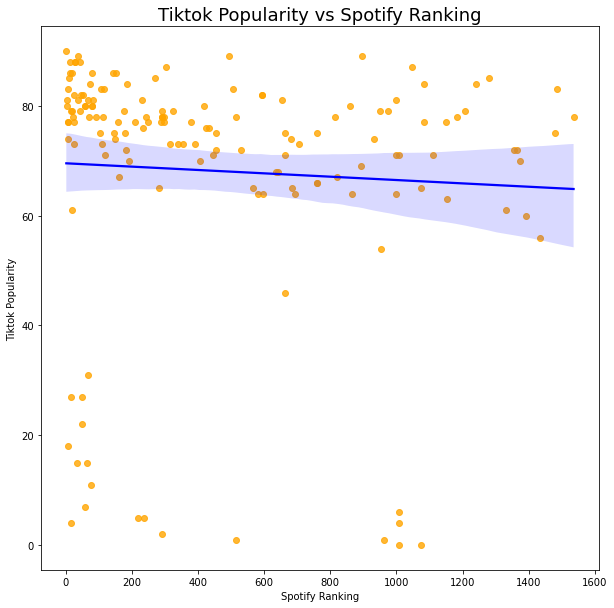

In [51]:
plt.rcParams["figure.figsize"] = (10,10)
ax = sns.regplot(x = 'Ranking', y = 'track_pop', data = spotify_tiktok, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.set_xlabel('Spotify Ranking')
ax.set_ylabel('Tiktok Popularity')
ax.set_title('Tiktok Popularity vs Spotify Ranking', size = 18)

There is no strong correlation between the song's popularity on Tiktok and its popularity on Spotify